In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from zipfile import ZipFile
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

import datetime
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,BatchNormalization,Activation,Flatten,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
import matplotlib.pyplot as plt
import csv
import random
import cv2
from tqdm import tqdm

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D , MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import confusion_matrix
from keras import optimizers
from keras.preprocessing.image import  ImageDataGenerator as IDG


np.random.seed(1234)

In [4]:
data_dir = '/content/drive/MyDrive/hw03/German-Traffic-Signs-Dataset-GTSRB-master'
train_path = '/content/drive/MyDrive/hw03/German-Traffic-Signs-Dataset-GTSRB-master/Train'
test_path = '/content/drive/MyDrive/hw03/German-Traffic-Signs-Dataset-GTSRB-master/'

IMG_HEIGHT = 50
IMG_WIDTH = 50
channels = 3

In [5]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [6]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

<Figure size 1512x720 with 0 Axes>

<BarContainer object of 43 artists>

([<matplotlib.axis.XTick at 0x7f89794b3cd0>,
 <a list of 43 Text major ticklabel objects>)

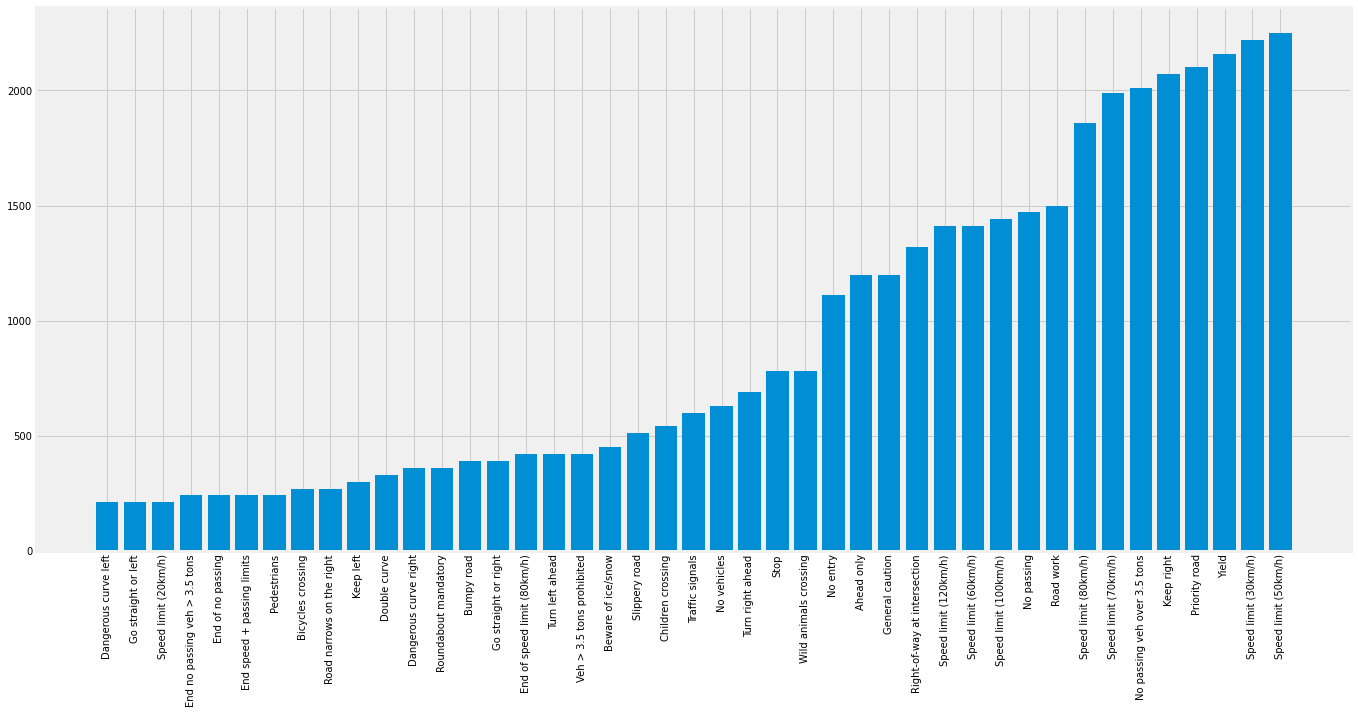

In [7]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [8]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39219, 50, 50, 3) (39219,)


In [9]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [10]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27453, 50, 50, 3)
X_valid.shape (11766, 50, 50, 3)
y_train.shape (27453,)
y_valid.shape (11766,)


In [11]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27453, 43)
(11766, 43)


شبکه های متفاوتی در یادگیری انتقالی وجود دارد از جمله شبکه هایی که بر روی تصاویر خاصی ساخته شده اند:

https://keras.io/api/applications/

VGG16-VGG19------>imagenet ----->INPUT_SIZE=224,224,3

DenseNet----->imagenet------->INPUT_SIZE=224,224,3

ResNet------>imagenet ----->INPUT_SIZE=224,224,3

اکثر شبکه هایی که برای کارهای یادگیری انتقالی اماده شده هستند سایز ورودی ان ها 224 در 224 در عمق 3 است و باید سایز ورودی خود را به سایز ان شبکه ببریم تا بتونیم از وزن های شبکه از قبل اموزش دیده استفاده کنیم

یادگیری انتقالی در کل برای مسائلی مناسب است که ساختارها و شبکه هایی که از قبل روی دیتاهای بزرگ اموزش دیده اند توانسته اند به دقت خوبی در مسائل متفاوت برسند

که حالا ما بیایم از این شبکه برای مسائل خود به کار ببریم که از جمله فواید ان این است که اموزش شبکه را سریعتر و با دقت بالاتری برسیم

برای مثال در شبکه یادگیری انتقالی اول که روی دیتاست ایمیج نت اموزش دیده روی تصاویر دقت خیلی خوبی دارد و ما میتوانیم وزن های ان را دریافت و روی دیتاست خود اعمال کنیم

و بتواند ویژگی های خوبی از تصاویر استخراج کند 

اول برای اینکه بتوانیم از یادگیری انتقالی، شبکه های از قبل اموزش دیده استفاده کنیم باید اول کتابخانه را لود کنیم و بعد از ان مدل پایه را دریافت کنیم که کد برای همه روش ها همین مدل است که نوشته ام 

ورودی حتما باید 224 در 224 در عمق 3 باشد تا بتونیم از این دیتا ها به بهترین نحو استفاده کنیم برای اینکار از این روش میتوان استفاده نمود

image_data = preprocess_input(image_data)

که این یک تابع اماده است

دلیل اینکه میگویم باید 224 در 224 در عمق 3 باشد این است که بتوانیم استفاده کنیم از این شبکه ها این است که این دیتاست هایی که معرفی شد که مدل ها روی ان ساخته شده است در همین سایز بوده اند و روی همین سایز اموزش دیده اند به همین دلیل سایز ورودی ما باید متناسب باشد

بعد از این که مدل پایه را ساختیم باید یک اصطلاحی به اسم فریز کردن انجام بدیم یعنی من میخواهم لایه هایی که مربوط به مدل از قبل ساخته شده را استفاده نکنم و اون وزن هایی که در فرایند قبلی به دست امده استفاده کنم برای همین از این قطعه کد استفاده میکنم

و بعد متناسب با مسئله خودمان لایه اضافه میکنیم دراپ اوت یا نرمالسازی انجام میدهم

در اینجا من نتوانستم با همان سایز 224 در 224 استفاده کنم چون نمیتوانستم روی گوگل کولب اجرا بگیرم و مشکل رم داشتم برای همین من سایز کوچکتر در نظر گرفتم 

برای اینکه بتوانم به دقت خوبی برسم به خاطر این سایز تصویر من شبکه را قویتر کردم و نرون های لایه دنس را افزایش دادم همونطور که در زیر نشان دادم میشود دید تاثیر افزایش دقت با قویتر کردن شبکه بر روی داده هایمان

که البته چون لایه های فولی کانکت را بالا میبریم باید نرمالسازی و دراپ اوت را بزاریم تا جلوی اورفیت شدن را بگیرد(متن خطای ایجاد شده در گوگل کولب به پیوست ارسال شد) از شما خواهشمندم به خاطر این مشکل سیستمی که دارم نمره ای از بابت ان کسر نشود چون زمان تمرین هم محدود بود ولی مفهوم سوال را به طور کامل یاد گرفتم.

Your session crashed after using all available RAM.

In [12]:
base_model = VGG19(input_shape=(50,50,3), 
                         include_top=False,
                         weights="imagenet")

80150528/80134624 [==============================] - 3s 0us/step


In [13]:
for layer in base_model.layers:
    layer.trainable=False

In [15]:
n_classes=43
def create_model(activation_function):
  model = Sequential()
  model.add(base_model)
  model.add(Flatten())

  model.add(Dense(128, activation=activation_function))
  model.add(Dense(n_classes, activation='softmax'))
  return model

In [16]:
model = create_model('relu')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 43)                5547      
                                                                 
Total params: 20,095,595
Trainable params: 71,211
Non-trainable params: 20,024,384
_________________________________________________________________


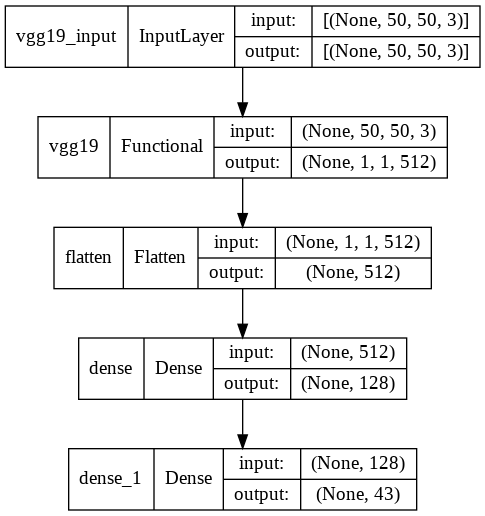

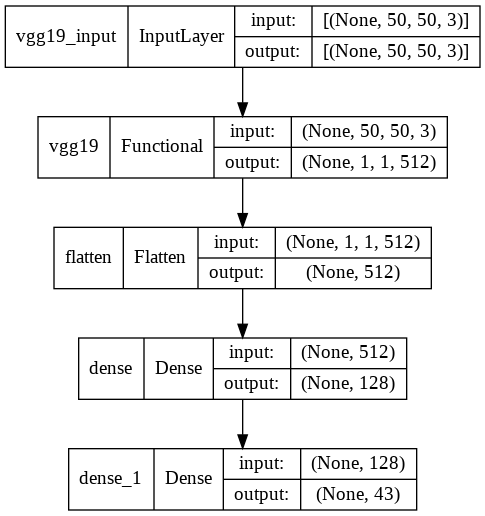

In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

In [19]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)

Epoch 1/10
858/858 [==============================] - 53s 51ms/step - loss: 1.9083 - accuracy: 0.4406 - val_loss: 1.4879 - val_accuracy: 0.5336
Epoch 2/10
858/858 [==============================] - 51s 59ms/step - loss: 1.3030 - accuracy: 0.5982 - val_loss: 1.2117 - val_accuracy: 0.6272
Epoch 3/10
858/858 [==============================] - 43s 50ms/step - loss: 1.0803 - accuracy: 0.6645 - val_loss: 1.0628 - val_accuracy: 0.6662
Epoch 4/10
858/858 [==============================] - 43s 50ms/step - loss: 0.9370 - accuracy: 0.7079 - val_loss: 0.9467 - val_accuracy: 0.7065
Epoch 5/10
858/858 [==============================] - 42s 49ms/step - loss: 0.8318 - accuracy: 0.7418 - val_loss: 0.8945 - val_accuracy: 0.7186
Epoch 6/10
858/858 [==============================] - 42s 49ms/step - loss: 0.7547 - accuracy: 0.7621 - val_loss: 0.8410 - val_accuracy: 0.7329
Epoch 7/10
858/858 [==============================] - 42s 49ms/step - loss: 0.6913 - accuracy: 0.7839 - val_loss: 0.7827 - val_accuracy:

Text(0.5, 1.0, 'Model accuracy simple')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

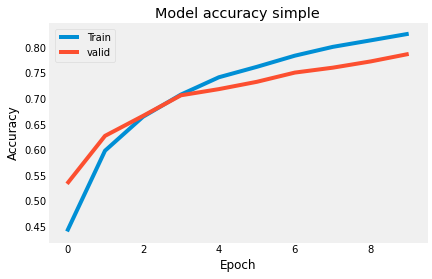

Text(0.5, 1.0, 'Model loss simple')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

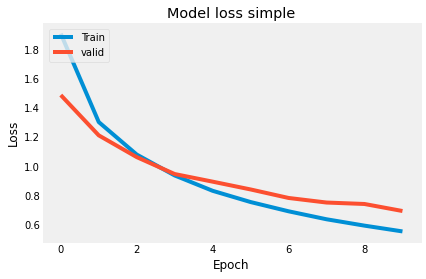

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

In [22]:
n_classes=43
def create_model(activation_function):
  model = Sequential()
  model.add(base_model)
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(128, activation=activation_function))
  model.add(BatchNormalization())
  model.add(Dense(n_classes, activation='softmax'))
  return model

In [23]:
model = create_model('relu')

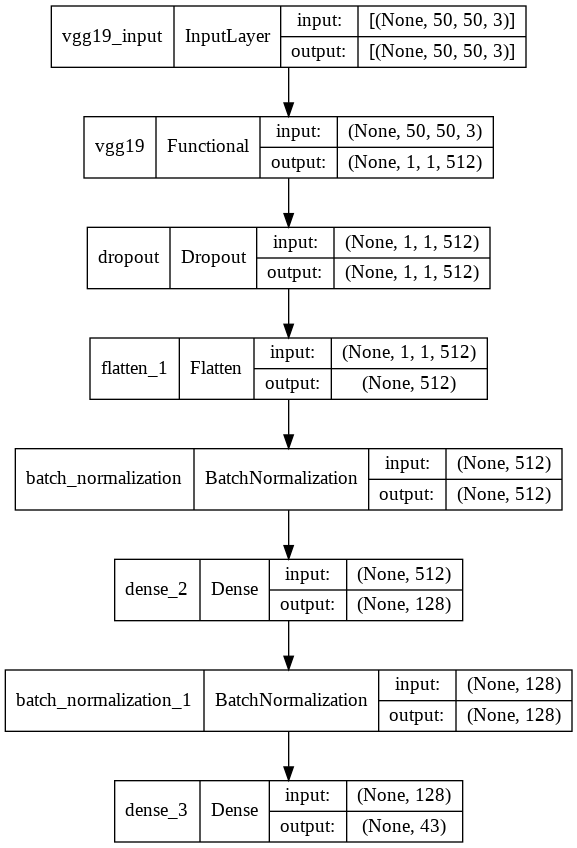

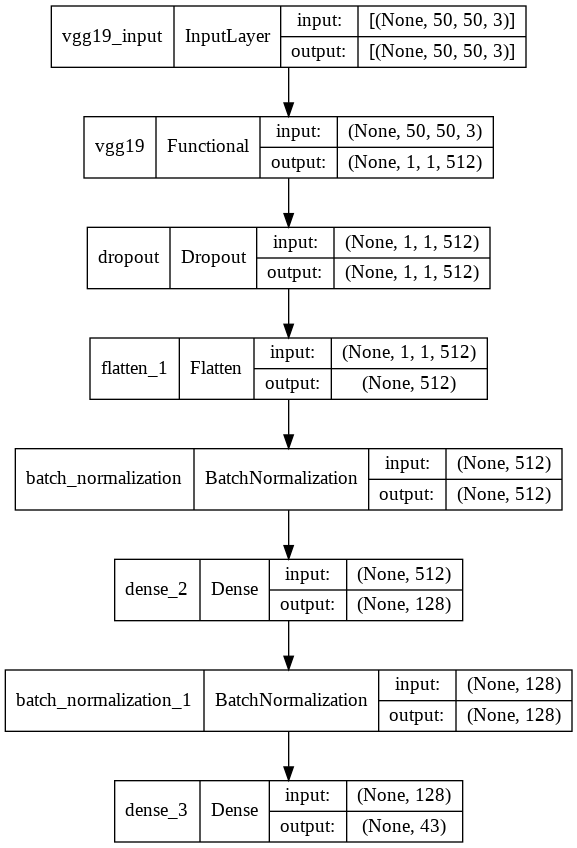

In [24]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

In [25]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)

Epoch 1/10
858/858 [==============================] - 45s 50ms/step - loss: 2.2660 - accuracy: 0.3520 - val_loss: 1.5462 - val_accuracy: 0.5275
Epoch 2/10
858/858 [==============================] - 42s 49ms/step - loss: 1.8159 - accuracy: 0.4412 - val_loss: 1.4079 - val_accuracy: 0.5709
Epoch 3/10
858/858 [==============================] - 42s 49ms/step - loss: 1.7134 - accuracy: 0.4696 - val_loss: 1.3291 - val_accuracy: 0.5923
Epoch 4/10
858/858 [==============================] - 44s 52ms/step - loss: 1.6528 - accuracy: 0.4843 - val_loss: 1.2731 - val_accuracy: 0.6090
Epoch 5/10
858/858 [==============================] - 53s 62ms/step - loss: 1.6145 - accuracy: 0.4978 - val_loss: 1.2331 - val_accuracy: 0.6293
Epoch 6/10
858/858 [==============================] - 45s 52ms/step - loss: 1.5796 - accuracy: 0.5057 - val_loss: 1.2071 - val_accuracy: 0.6435
Epoch 7/10
858/858 [==============================] - 53s 62ms/step - loss: 1.5556 - accuracy: 0.5134 - val_loss: 1.1875 - val_accuracy:

In [27]:
n_classes=43
def create_model(activation_function):
  model = Sequential()
  model.add(base_model)
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(512, activation=activation_function))
  model.add(Dense(n_classes, activation='softmax'))
  return model

In [28]:
model = create_model('relu')

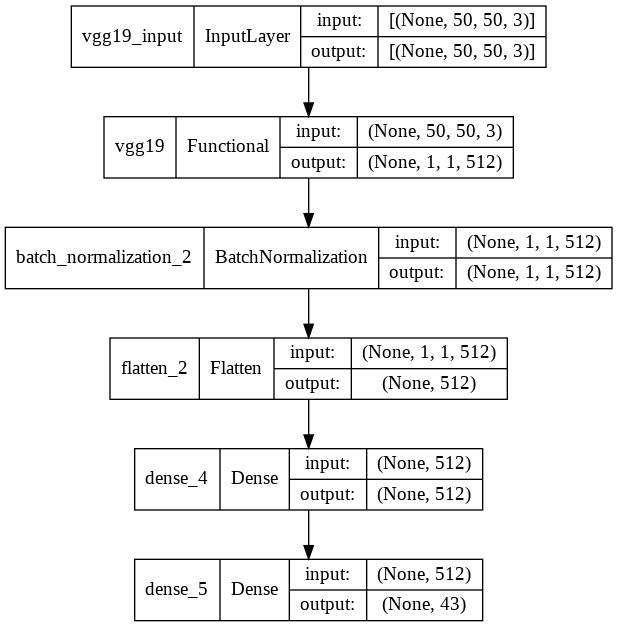

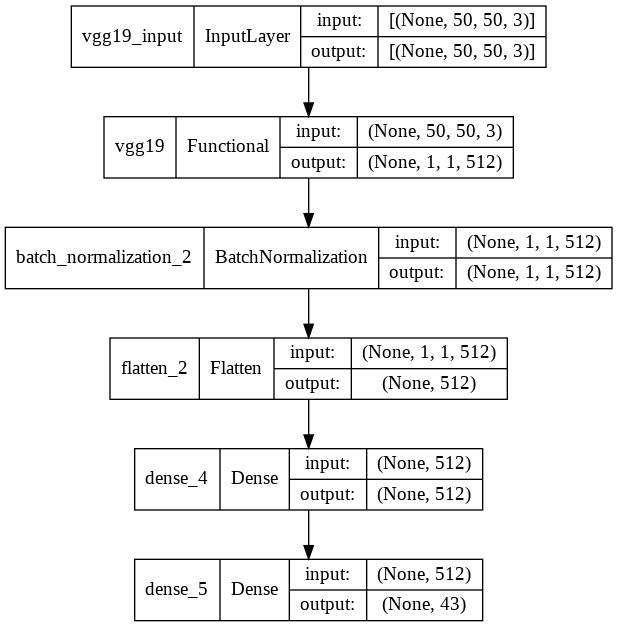

In [29]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

In [30]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)

Epoch 1/10
858/858 [==============================] - 45s 50ms/step - loss: 1.3178 - accuracy: 0.6003 - val_loss: 0.8911 - val_accuracy: 0.7228
Epoch 2/10
858/858 [==============================] - 42s 49ms/step - loss: 0.7540 - accuracy: 0.7586 - val_loss: 0.7276 - val_accuracy: 0.7795
Epoch 3/10
858/858 [==============================] - 51s 59ms/step - loss: 0.5742 - accuracy: 0.8152 - val_loss: 0.6386 - val_accuracy: 0.8172
Epoch 4/10
858/858 [==============================] - 44s 52ms/step - loss: 0.4688 - accuracy: 0.8473 - val_loss: 0.5903 - val_accuracy: 0.8341
Epoch 5/10
858/858 [==============================] - 44s 52ms/step - loss: 0.4052 - accuracy: 0.8692 - val_loss: 0.5451 - val_accuracy: 0.8559
Epoch 6/10
858/858 [==============================] - 44s 52ms/step - loss: 0.3523 - accuracy: 0.8855 - val_loss: 0.5465 - val_accuracy: 0.8597
Epoch 7/10
858/858 [==============================] - 44s 51ms/step - loss: 0.3201 - accuracy: 0.8971 - val_loss: 0.5373 - val_accuracy:

Text(0.5, 1.0, 'Model accuracy simple')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

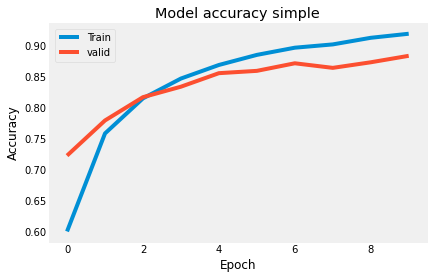

Text(0.5, 1.0, 'Model loss simple')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

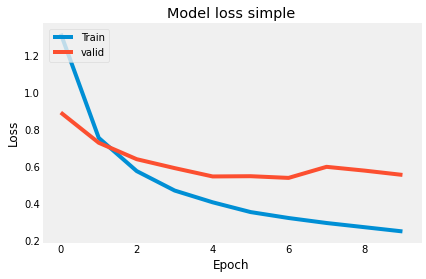

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

In [14]:
n_classes=43
def create_model(activation_function):
  model = Sequential()
  model.add(base_model)
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(1024, activation=activation_function))
  model.add(Dense(n_classes, activation='softmax'))
  return model

In [15]:
model = create_model('relu')

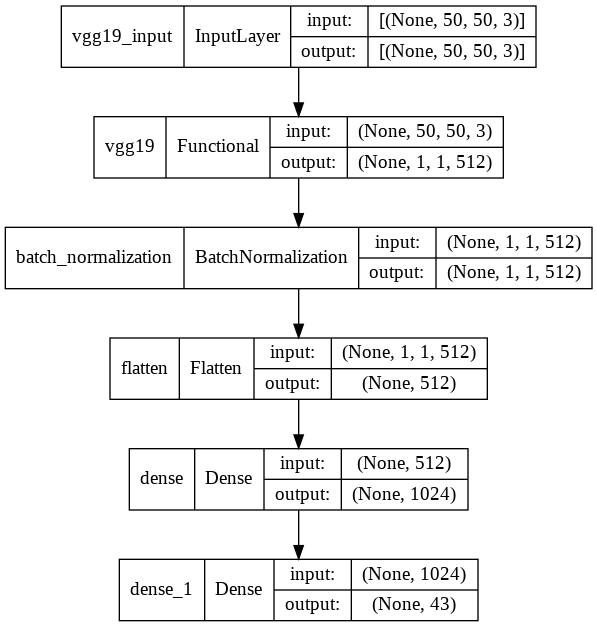

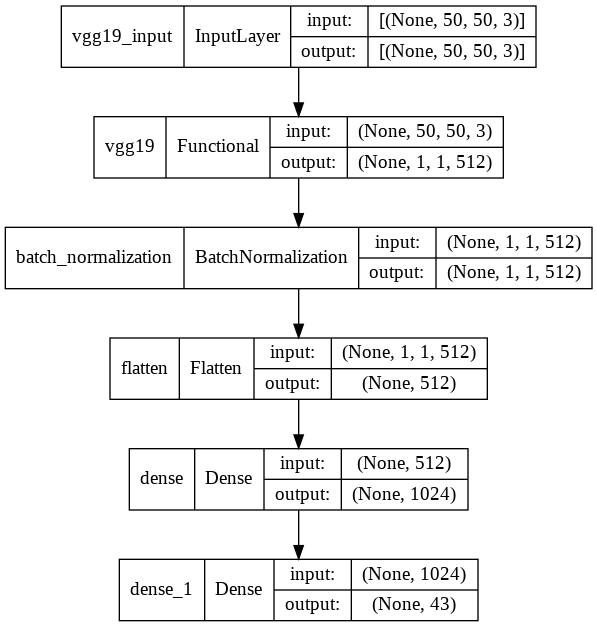

In [16]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

In [17]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)

Epoch 1/10
858/858 [==============================] - 1224s 1s/step - loss: 1.2764 - accuracy: 0.6135 - val_loss: 0.9072 - val_accuracy: 0.7223
Epoch 2/10
858/858 [==============================] - 1232s 1s/step - loss: 0.7262 - accuracy: 0.7672 - val_loss: 0.7375 - val_accuracy: 0.7756
Epoch 3/10
858/858 [==============================] - 1228s 1s/step - loss: 0.5514 - accuracy: 0.8222 - val_loss: 0.6331 - val_accuracy: 0.8304
Epoch 4/10
858/858 [==============================] - 1228s 1s/step - loss: 0.4426 - accuracy: 0.8571 - val_loss: 0.5685 - val_accuracy: 0.8538
Epoch 5/10
858/858 [==============================] - 1244s 1s/step - loss: 0.3765 - accuracy: 0.8788 - val_loss: 0.6524 - val_accuracy: 0.8425
Epoch 6/10
858/858 [==============================] - 1218s 1s/step - loss: 0.3342 - accuracy: 0.8935 - val_loss: 0.5756 - val_accuracy: 0.8645
Epoch 7/10
858/858 [==============================] - 1217s 1s/step - loss: 0.3031 - accuracy: 0.9043 - val_loss: 0.5873 - val_accuracy:

In [19]:
from tensorflow.keras.applications import DenseNet121, Xception, VGG16, ResNet50